In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

sym.init_printing()

In [6]:
a, b, c, m, x, y = sym.symbols('a, b, c, m, x,y')
x1, x2, y1, y2 = sym.symbols('x1, x2, y1, y2')

slope_formula = (y2 - y1) / (x2 - x1)
slope_intercept_formula = m * x - y + b
standard_equation_formula = a * x + b * y - c

slope_intercept_formulas = {
    "y_intercept_formula": sym.solve(slope_intercept_formula, x)[0],
    "x_intercept_formula": sym.solve(slope_intercept_formula, y)[0],
    'constant_formula': sym.solve(slope_intercept_formula.subs({x: 0}), x)
}


def generate_coord_list(m, x, b):
    y = m * np.array(x) + b
    return y


def draw_linear_equation(x_value_list, y_value_list, slope, constant):
    plt.plot(x_value_list, y_value_list, label='y = %sx + %s' % (slope, constant))


def intersecting_point(slope1, constant1, slope2, constant2):
    # Step 1: Homogenize both line equations
    l1 = slope_intercept_formula.subs({m: slope1, b: constant1})
    l2 = slope_intercept_formula.subs({m: slope2, b: constant2})

    # Step 2: Solve the 1st equation for x
    x_formula = sym.solve(l1, x)[0]

    # Step 3: Substitute Step 2 equation into the second equation, solving for y
    y_value = sym.solve(l2.subs({x: x_formula}))[0]

    # Step 4: Substitute y value into 1st equation and solve for x
    x_value = sym.solve(l2.subs({x: y_value}))[0]

    plt.plot(x_value, y_value, 'o')
    return [x_value, y_value]

# display(Math('0=%s' % sym.latex(slope_intercept_formula)))
# display(Math('x=%s' % sym.latex(slope_intercept_formulas['y_intercept_formula'])))
# display(Math('y=%s' % sym.latex(slope_intercept_formulas['x_intercept_formula'])))
# display(Math('m=%s' % sym.latex(slope_intercept_formulas['slope_formula'])))
# display(Math('b=%s' % sym.latex(slope_intercept_formulas['constant_formula'])))

In [7]:
def solve_system_of_equations(lines, x_values, eq_form):
    x, y, b = sym.symbols('x, y, b')

    graph_data = {
        'solution': [],
        'lines': [],
    }

    for i in range(0, len(lines)):
        line = lines[i]
        x_intercept = 0
        y_intercept = 0

        if eq_form == 'standard':
            standard_equation_form = standard_equation_formula.subs({a: line[0], b: line[1], c: line[2]})
            x_intercept = sym.solve(sym.solve(standard_equation_form, y)[0])[0]
            y_intercept = sym.solve(sym.solve(standard_equation_form, x)[0])[0]

        if eq_form == 'slope_intercept':
            x_intercept = sym.solve(slope_intercept_formulas['x_intercept_formula'].subs({m: line[0], b: line[1]}))[0]
            y_intercept = sym.solve(slope_intercept_formulas['y_intercept_formula'].subs({m: line[0], b: line[1]}))[0]

        constant = y_intercept
        x_intercept_coord = [x_intercept, 0]
        y_intercept_coord = [0, constant]
        slope = slope_formula.subs(
            {x1: x_intercept_coord[0], x2: y_intercept_coord[0], y1: x_intercept_coord[1], y2: y_intercept_coord[1]})
        y_values = generate_coord_list(slope, x_values, constant)

        draw_linear_equation(x_values, y_values, slope, constant)

        graph_data['lines'].append({
            'm': slope,
            'b': constant,
            'x_values': x_values,
            'y_values': y_values,
            'x_intercept': x_intercept_coord,
            'y_intercept': y_intercept_coord
        })

    line1 = graph_data['lines'][0]
    line2 = graph_data['lines'][1]

    solution = intersecting_point(line1['m'], line1['b'], line2['m'], line2['b'])
    graph_data['solution'] = solution

    # Style Chart
    plt.grid()

    # Draw the x and y axis
    axis = plt.gca()
    plt.plot(axis.get_xlim(), [0, 0], 'k--')
    plt.plot([0, 0], axis.get_ylim(), 'k--')

    plt.legend()
    plt.show()

    return graph_data

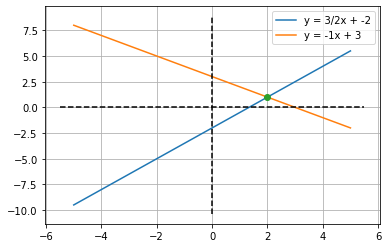

{'solution': [2, 1],
 'lines': [{'m': 3/2,
   'b': -2,
   'x_values': [-5, 5],
   'y_values': array([-19/2, 11/2], dtype=object),
   'x_intercept': [4/3, 0],
   'y_intercept': [0, -2]},
  {'m': -1,
   'b': 3,
   'x_values': [-5, 5],
   'y_values': array([8, -2], dtype=object),
   'x_intercept': [3, 0],
   'y_intercept': [0, 3]}]}

In [8]:
solve_system_of_equations([[3, -2, 4], [1, 1, 3]], [-5, 5], 'standard')
# solve_system_of_equations([[3 / 2, -2], [-1, 3]], [-5, 5], 'slope_intercept')